In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [14]:
df = pd.read_csv("creditcard.csv")

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Normal transactions count:  284315
Fraudulent transactions count:  492


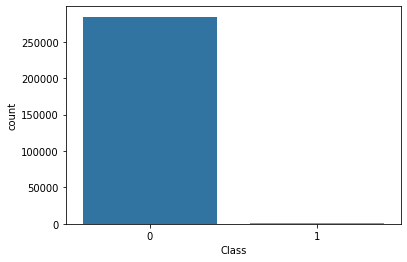

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])
sns.countplot(df["Class"])
plt.show()

In [18]:
X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array

In [19]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [20]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))
print("smote_pipeline.score:")
print(smote_pipeline.score(X_test, y_test))
print("accuracy:",accuracy_score(y_test, smote_prediction))
print("precision:",precision_score(y_test, smote_prediction))
print("recall:",recall_score(y_test, smote_prediction))
print("f2:",fbeta_score(y_test, smote_prediction,beta=2))


Confusion Matrix: 
[[56866    12]
 [   14    70]]
smote_pipeline.score:
0.9995435553526912
accuracy: 0.9995435553526912
precision: 0.8536585365853658
recall: 0.8333333333333334
f2: 0.8373205741626795


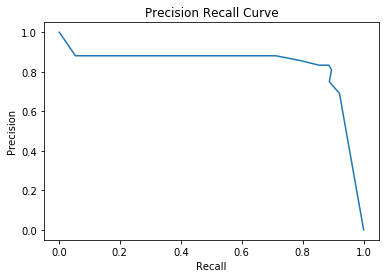

In [21]:
# predicted probabilities
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]
# precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score
# Logistic Regression
logreg = LogisticRegression(C=10, penalty='l2',random_state=2)

#Fiting the model
logreg.fit(X_train, y_train)
           
# Printing the Training Score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

Cross Validation of X and y Train: 
[0.63414634 0.51219512 0.64634146 0.60493827 0.50617284]


In [23]:
# Predicting with the best params
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("accuracy:",accuracy_score(y_test, y_pred))
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))
print("f2:",fbeta_score(y_test, y_pred,beta=2))

[[56853    25]
 [   31    53]]
accuracy: 0.9990168884519505
precision: 0.6794871794871795
recall: 0.6309523809523809
f2: 0.640096618357488


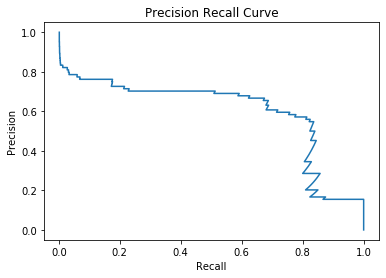

In [24]:
#Predicting probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]
#precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()